In [11]:
import pandas as pd
import csv
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

path = os.getcwd()

#create a dict that stores the times and loads of each zone
loads = {}
for i in range(1, 22):
    #keys for the load
    loads['load_{}'.format(i)] = []
    #keys for the time (datetime objects)
    loads['time_{}'.format(i)] = []


with open('/Users/jmsjb/Desktop/Load_history.csv', 'rt', encoding='ascii') as lcsv:
    loadreader = csv.reader(lcsv)
    for index, row in list(enumerate(loadreader)):
        if index == 0:
            continue
        for i, col in enumerate(row):
           if col == '':
               continue
           #we look at the loads and temperatures which 
           #start in the 5th column
           if i > 3:
                hour = i - 4
                year = int(row[1])
                month = int(row[2])
                day = int(row[3])
                load = int(col.replace(',', ''))
                loads['time_{}'.format(row[0])].append(datetime(year, month, day, hour))
                loads['load_{}'.format(row[0])].append(load)

#create a dict that stores the times and loads of each zone
temps  = {}
for i in range(1, 12):
    #keys for the temperature
    temps['temp_{}'.format(i)] = [] 
    #keys for the time (datetime objects)
    temps['time_{}'.format(i)] = []

with open('/Users/jmsjb/Desktop/temperature_history.csv', 'rt') as tcsv:
    tempreader = csv.reader(tcsv)
    for index, row in list(enumerate(tempreader)):
        #skip first row
        if index == 0:
            continue
        for i, col in enumerate(row):
           #ignore empty entries
           if col == '':
               continue
           #we look at the loads and temperatures which 
           #start in the 5th column
           if i > 3:
                hour = i - 4
                year = int(row[1])
                month = int(row[2])
                day = int(row[3])
                timeVal = datetime(year, month, day, hour)
                temps['time_{}'.format(row[0])].append(timeVal)
                temps['temp_{}'.format(row[0])].append(int(col))

#Create total load
totalLoad = []
for i in range(len(loads['load_1'])):
    totalLoad.append(sum(loads['load_{}'.format(j)][i] for j in range(1, 21)))
    

    
#create a dict that stores the times and loads of each zone
loads = {}
for i in range(1, 22):
    #keys for the load
    loads['load_{}'.format(i)] = []
    #keys for the time (datetime objects)
    loads['time_{}'.format(i)] = []


with open('/Users/jmsjb/Desktop/Load_history.csv', 'rt', encoding='ascii') as lcsv:
    loadreader = csv.reader(lcsv)
    for index, row in list(enumerate(loadreader)):
        if index == 0:
            continue
        for i, col in enumerate(row):
           if col == '':
               continue
           #we look at the loads and temperatures which 
           #start in the 5th column
           if i > 3:
                hour = i - 4
                year = int(row[1])
                month = int(row[2])
                day = int(row[3])
                load = int(col.replace(',', ''))
                loads['time_{}'.format(row[0])].append(datetime(year, month, day, hour))
                loads['load_{}'.format(row[0])].append(load)
                
                
                
#####################
#Create total load
totalLoad_2 = []
for i in range(len(loads['load_1'])):
    totalLoad_2.append(sum(loads['load_{}'.format(j)][i] for j in range(1, 21)))
    

    
#create a dict that stores Solutions
Solutions = {}
for i in range(1, 22):
    #keys for the load
    Solutions['load_{}'.format(i)] = []
    #keys for the time (datetime objects)
    Solutions['time_{}'.format(i)] = []


with open('/Users/jmsjb/Desktop/Load_solution_1.csv', 'rt') as lcsv:
    loadreader = csv.reader(lcsv)
    for index, row in list(enumerate(loadreader)):
        if index == 0:
            continue
        for i, col in enumerate(row):
           if col == '':
               continue
           #we look at the loads and temperatures which 
           #start in the 5th column
           if i > 3:
                hour = i - 4
                year = int(row[1])
                month = int(row[2])
                day = int(row[3])
                load = int(col.replace(',', ''))
                Solutions['time_{}'.format(row[0])].append(datetime(year, month, day, hour))
                Solutions['load_{}'.format(row[0])].append(load)
                
                
 

for i in range(1, 12):
    j = 0
    time = 'time_{}'.format(i)
    temp = 'temp_{}'.format(i)
    tempList = []
    for k in range(len(temps[time])):
        if loads[time][j] == temps[time][k]:
            tempList.append(temps[temp][k])
            j += 1
    temps[temp] = tempList

In [12]:
Solutions.keys()



dict_keys(['load_1', 'time_1', 'load_2', 'time_2', 'load_3', 'time_3', 'load_4', 'time_4', 'load_5', 'time_5', 'load_6', 'time_6', 'load_7', 'time_7', 'load_8', 'time_8', 'load_9', 'time_9', 'load_10', 'time_10', 'load_11', 'time_11', 'load_12', 'time_12', 'load_13', 'time_13', 'load_14', 'time_14', 'load_15', 'time_15', 'load_16', 'time_16', 'load_17', 'time_17', 'load_18', 'time_18', 'load_19', 'time_19', 'load_20', 'time_20', 'load_21', 'time_21'])

In [13]:
# Create Temp data frame for Temp
d={ 
    'temp_1': temps.get('temp_1'), 'temp_2': temps.get('temp_2'), 
  'temp_3': temps.get('temp_3'), 'temp_4': temps.get('temp_4'),
  'temp_5': temps.get('temp_5'), 'temp_6': temps.get('temp_6'),
  'temp_7': temps.get('temp_7'), 'temp_8': temps.get('temp_8'),
  'temp_9': temps.get('temp_9'), 'temp_10': temps.get('temp_10'),
  'temp_11': temps.get('temp_11')}
#temp_dft = pd.Series(data=d)
temp_df = pd.DataFrame(data=d)
temp_df['Temp_mean'] = temp_df.mean(axis=1)


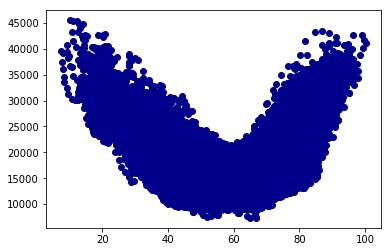

In [14]:
# Load station data frames
s1=pd.DataFrame({ 'Date': loads.get('time_1'), 'Load_1': loads.get('load_1')})
s2=pd.DataFrame({ 'Date': loads.get('time_2'), 'Load_2': loads.get('load_2')})
s3=pd.DataFrame({ 'Date': loads.get('time_3'), 'Load_3': loads.get('load_3')})
s4=pd.DataFrame({ 'Date': loads.get('time_4'), 'Load_4': loads.get('load_4')})
s5=pd.DataFrame({ 'Date': loads.get('time_5'), 'Load_5': loads.get('load_5')})
s6=pd.DataFrame({ 'Date': loads.get('time_6'), 'Load_6': loads.get('load_6')})
s7=pd.DataFrame({ 'Date': loads.get('time_7'), 'Load_7': loads.get('load_7')})
s8=pd.DataFrame({ 'Date': loads.get('time_8'), 'Load_8': loads.get('load_8')})
s9=pd.DataFrame({ 'Date': loads.get('time_9'), 'Load_9': loads.get('load_9')})
s10=pd.DataFrame({ 'Date': loads.get('time_10'), 'Load_11': loads.get('load_10')})
s11=pd.DataFrame({ 'Date': loads.get('time_11'), 'Load_11': loads.get('load_11')})
s12=pd.DataFrame({ 'Date': loads.get('time_12'), 'Load_12': loads.get('load_12')})
s13=pd.DataFrame({ 'Date': loads.get('time_13'), 'Load_13': loads.get('load_13')})
s14=pd.DataFrame({ 'Date': loads.get('time_14'), 'Load_14': loads.get('load_14')})
s15=pd.DataFrame({ 'Date': loads.get('time_15'), 'Load_15': loads.get('load_15')})
s16=pd.DataFrame({ 'Date': loads.get('time_16'), 'Load_16': loads.get('load_16')})
s17=pd.DataFrame({ 'Date': loads.get('time_17'), 'Load_17': loads.get('load_17')})
s18=pd.DataFrame({ 'Date': loads.get('time_18'), 'Load_18': loads.get('load_18')})
s19=pd.DataFrame({ 'Date': loads.get('time_19'), 'Load_19': loads.get('load_19')})
s20=pd.DataFrame({ 'Date': loads.get('time_20'), 'Load_20': loads.get('load_20')})
s21=pd.DataFrame({ 'Date': loads.get('time_21'), 'Load_21': loads.get('load_21')})

# concatenating loading zone and avg. weather
f1 = pd.concat([s1, temp_df],axis = 1)
f2 = pd.concat([s2, temp_df['Temp_mean']],axis = 1)
f3 = pd.concat([s3, temp_df['Temp_mean']],axis = 1)
f4 = pd.concat([s4, temp_df['Temp_mean']],axis = 1)
f5 = pd.concat([s5, temp_df['Temp_mean']],axis = 1)
f6 = pd.concat([s6, temp_df['Temp_mean']],axis = 1)
f7 = pd.concat([s7, temp_df['Temp_mean']],axis = 1)
f8 = pd.concat([s8, temp_df['Temp_mean']],axis = 1)
f9 = pd.concat([s9, temp_df['Temp_mean']],axis = 1)
f10 = pd.concat([s10, temp_df['Temp_mean']],axis = 1)
f11 = pd.concat([s11, temp_df['Temp_mean']],axis = 1)
f12 = pd.concat([s12, temp_df['Temp_mean']],axis = 1)
f13 = pd.concat([s13, temp_df['Temp_mean']],axis = 1)
f14 = pd.concat([s14, temp_df['Temp_mean']],axis = 1)
f15 = pd.concat([s15, temp_df['Temp_mean']],axis = 1)
f16 = pd.concat([s16, temp_df['Temp_mean']],axis = 1)
f17 = pd.concat([s17, temp_df['Temp_mean']],axis = 1)
f18 = pd.concat([s18, temp_df['Temp_mean']],axis = 1)
f19 = pd.concat([s19, temp_df['Temp_mean']],axis = 1)
f20 = pd.concat([s20, temp_df['Temp_mean']],axis = 1)
f21 = pd.concat([s21, temp_df['Temp_mean']],axis = 1)

# Create TS Object for station 1
#ts1 = f1.set_index('Date',append=False)

plt.scatter(f1['Temp_mean'],f1['Load_1'], color = "Darkblue")
plt.show()



In [19]:
# Station 1
# Create TS Object for Station 1 Backcast Actuals
ts1 = f1.set_index('Date',append=False)

# Make Training cuts for forecasted intervals between missing data
f1_1=ts1['2004-01-01 00:00:00':'2005-03-05 23:00:00'] #2005/3/6 - 2005/3/12;
f1_2=ts1['2005-03-13 00:00:00':'2005-06-19 23:00:00'] #2005/6/20 - 2005/6/26;
f1_3=ts1['2005-06-27 00:00:00':'2005-09-09 23:00:00'] #2005/9/10 - 2005/9/16;
f1_4=ts1['2005-09-17 00:00:00':'2005-12-24 23:00:00'] #2005/12/25 - 2005/12/31;
f1_5=ts1['2006-01-01 00:00:00':'2006-02-12 23:00:00'] #2006/2/13 - 2006/2/19;
f1_6=ts1['2006-02-20 00:00:00':'2006-05-30 23:00:00'] #2006/5/25 - 2006/5/31;
f1_7=ts1['2006-06-01 00:00:00':'2006-08-01 23:00:00'] #2006/8/2 - 2006/8/8;
f1_8=ts1['2006-08-09 00:00:00':'2006-11-21 23:00:00'] #2006/11/22 - 2006/11/28;
f1_9=ts1['2006-11-29 00:00:00':'2008-06-30 05:00:00'] #last

# Solutions
SolStat1=pd.DataFrame({ 'Date': Solutions.get('time_1'), 'Load_1': Solutions.get('load_1')})
SS1=SolStat1.set_index('Date',append=False)



#### Training 1 ######
XTrain = np.array(f1_9['Load_1'])
XTrain = XTrain.reshape((f1_9.shape[0], 1))
Y = np.array(f1_9['Load_1']).ravel()


# Test1
XTest = SS1['2006-11-22 00:00:00':'2006-11-28 23:00:00']
XTest = np.array(XTest['Load_1'])
XTest = XTest.reshape((XTest.shape[0], 1))


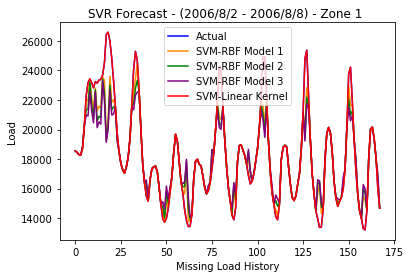

0.0537222381996272
1249.2087440699072
1459.3873568858967
1612.6902639212678


In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt


#### Fit SVM regression model
# RBF Kernel
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(XTrain, Y).predict(XTest)

# RBF Kernel 2
svr_rbf2 = SVR(kernel='rbf', C=1e3, gamma=0.15)
y_rbf2 = svr_rbf2.fit(XTrain, Y).predict(XTest)

# RBF Kernel 3
svr_rbf3 = SVR(kernel='rbf', C=1e3, gamma=0.2)
y_rbf3 = svr_rbf3.fit(XTrain, Y).predict(XTest)


# Linear Kernel
svr_lin = SVR(kernel='linear', C=1000)
y_lin = svr_lin.fit(XTrain, Y).predict(XTest)



#############################################################################
# Plot SVM Forecast
plt.plot(XTest, color='Blue', label='Actual')
plt.plot(y_rbf, color='darkorange', label='SVM-RBF Model 1')
plt.plot(y_rbf2, color='Green', label='SVM-RBF Model 2')
plt.plot(y_rbf3, color='Purple', label='SVM-RBF Model 3')
plt.plot(y_lin, color='Red', label='SVM-Linear Kernel')
plt.xlabel('Missing Load History')
plt.ylabel('Load')
plt.title('SVR Forecast - (2006/8/2 - 2006/8/8) - Zone 1 ')
plt.legend()
plt.show()

# RMSE Calc
rmse_lin = sqrt(mean_squared_error(XTest, y_lin))
rmse_rbf = sqrt(mean_squared_error(XTest, y_rbf))
rmse_rbf2 = sqrt(mean_squared_error(XTest, y_rbf2))
rmse_rbf3 = sqrt(mean_squared_error(XTest, y_rbf3))

print(rmse_lin)
print(rmse_rbf)
print(rmse_rbf2)
print(rmse_rbf3)


